In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt

/nfs/homedirs/bindera/miniconda3/envs/test_torch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results = seml.get_results('PGD', to_data_frame=True)

100%|██████████| 9/9 [00:00<00:00, 3660.66it/s]
/nfs/homedirs/bindera/miniconda3/envs/test_torch/lib/python3.7/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [7]:
for key in results['_id']:
    print(key)

1
2
3
4
5
6
7
8
9


In [6]:
results

,_id,config.overwrite,config.db_collection,config.cuda,config.data_folder,config.dropout,config.emb_dims,config.epsilon,config.iterations,config.k,config.model_path,config.test_batch_size,config.seed,result.test_acc,result.avg_per_class_acc
0,1,1,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,1,1,20,/nfs/homedirs/bindera/reference_implementation...,16,779046211,0.604133,0.514913
1,2,2,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,3,1,20,/nfs/homedirs/bindera/reference_implementation...,16,948501914,0.048217,0.029750
2,3,3,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,5,1,20,/nfs/homedirs/bindera/reference_implementation...,16,19772502,0.040519,0.025000
3,4,4,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,1,3,20,/nfs/homedirs/bindera/reference_implementation...,16,519095031,0.059157,0.039500
4,5,5,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,3,3,20,/nfs/homedirs/bindera/reference_implementation...,16,222657196,0.039708,0.024500
5,6,6,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,5,3,20,/nfs/homedirs/bindera/reference_implementation...,16,39923936,0.040113,0.024750
6,7,7,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,1,5,20,/nfs/homedirs/bindera/reference_implementation...,16,494990619,0.034846,0.021500
7,8,8,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,3,5,20,/nfs/homedirs/bindera/reference_implementation...,16,898625175,0.036872,0.022750
8,9,9,PGD,True,/nfs/shared/modelnet/modelnet40_normal_resampled,0.5,1024,5,5,20,/nfs/homedirs/bindera/reference_implementation...,16,833040733,0.036062,0.022250


In [9]:
results[['config.epsilon', 'config.iterations', 'result.test_acc']]

,config.epsilon,config.iterations,result.test_acc
0,1,1,0.604133
1,3,1,0.048217
2,5,1,0.040519
3,1,3,0.059157
4,3,3,0.039708
5,5,3,0.040113
6,1,5,0.034846
7,3,5,0.036872
8,5,5,0.036062


In [19]:
eps1 = results[results['config.epsilon']==1]
eps3 = results[results['config.epsilon']==3]
eps5 = results[results['config.epsilon']==5]
eps1[['config.epsilon', 'config.iterations', 'result.test_acc']]

,config.epsilon,config.iterations,result.test_acc
0,1,1,0.604133
3,1,3,0.059157
6,1,5,0.034846


In [26]:
eps1[['config.iterations']]

,config.iterations
0,1
3,3
6,5


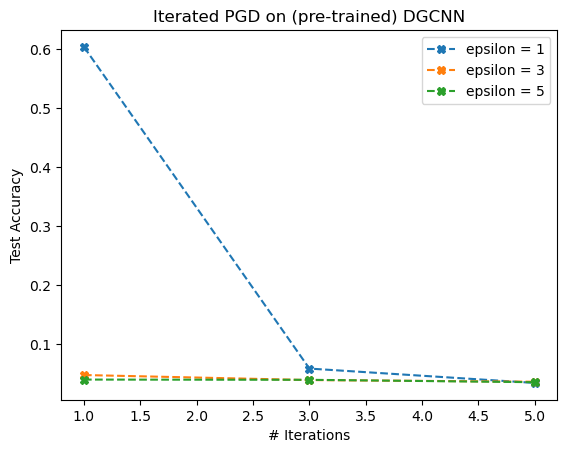

In [35]:
plt.plot([1,3,5], eps1[['result.test_acc']], label='epsilon = 1', linestyle='--', marker='X',)
plt.plot([1,3,5], eps3[['result.test_acc']], label='epsilon = 3', linestyle='--', marker='X',)
plt.plot([1,3,5], eps5[['result.test_acc']], label='epsilon = 5', linestyle='--', marker='X',)
plt.xlabel('# Iterations')
plt.ylabel('Test Accuracy')
plt.legend()
plt.title("Iterated PGD on (pre-trained) DGCNN")
plt.show()